Text(0.5, 1.0, 'Classes desbalanceadas')

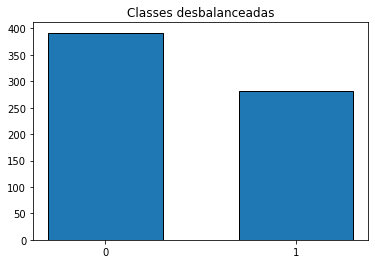

In [116]:
import pandas as pd
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


def esp(VN , FP):
    return VN/(VN+FP)

def sens(VP,FN):
    return VP/(VP+FN)


le = preprocessing.LabelEncoder()

finaldata = pd.read_csv('train.csv')

finaldata = finaldata.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])
finaldata['Sex'] = le.fit_transform(finaldata['Sex'])

#Dados com instancias com dados faltosos e duplicados excluidos
excluded = finaldata.dropna().drop_duplicates()

#Separando e normalizando as variáveis do resultado
X_Excluded = excluded.drop(columns='Survived')
X_Excluded = Normalizer().fit_transform(X_Excluded)

Y_Excluded = excluded['Survived']

plt.hist(Y_Excluded, bins=[-.3,.3,0.7,1.3], ec="k")
plt.xticks((0,1))
plt.title('Classes desbalanceadas')



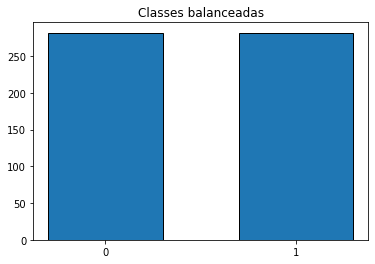

In [117]:

rus = RandomUnderSampler()
X_Excluded, Y_Excluded = rus.fit_resample(X_Excluded, Y_Excluded)



plt.hist(Y_Excluded, bins=[-.3,.3,0.7,1.3], ec="k")
plt.xticks((0,1))
plt.title('Classes balanceadas')

#Divisão da amostra para teste e treino
X_trainExcluded, X_testExcluded,Y_trainExcluded, Y_testExcluded = train_test_split(X_Excluded,Y_Excluded, test_size=0.2)

#Instanciando arvore de decisão e treinando
tree2 = DecisionTreeClassifier(max_depth= 7, splitter= 'random')
tree2.fit(X_trainExcluded,Y_trainExcluded)

#Treinamento Linear SVC
neighbors2 = KNeighborsClassifier(n_neighbors=3 ,weights= 'distance')
neighbors2.fit(X_trainExcluded,Y_trainExcluded)

#Predição da Arvore
Y_predictedExcluded = tree2.predict(X_testExcluded)
Y_predictedNeighborsExcluded = neighbors2.predict(X_testExcluded)

#___________________________________________________________________________________________________________


In [118]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[36 14]
 [16 47]]


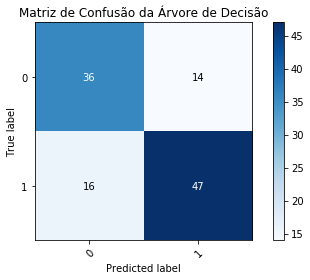

In [119]:
plot_confusion_matrix(Y_testExcluded, Y_predictedExcluded, classes = ['0','1'],
                      title='Matriz de Confusão da Árvore de Decisão')


In [120]:
names = ['Decision Tree','KNeighbors']

tnT, fpT, fnT, tpT = confusion_matrix(Y_testExcluded, Y_predictedExcluded).ravel()

tnK, fpK, fnK, tpK = confusion_matrix(Y_testExcluded, Y_predictedNeighborsExcluded).ravel()

frame = []

frame += [[names[0],round(esp(tnT,fpT),2),round(sens(tpT,fnT),2),round(f1_score(Y_testExcluded, Y_predictedExcluded),2), round(accuracy_score(Y_testExcluded, Y_predictedExcluded),2)]]

frame += [[names[1],round(esp(tnK,fpK),2),round(sens(tpK,fnK),2),round(f1_score(Y_testExcluded, Y_predictedNeighborsExcluded),2), round(accuracy_score(Y_testExcluded, Y_predictedNeighborsExcluded),2)]]

df = pd.DataFrame(frame, columns = ['Algoritmo', 'Especificidade', 'Sensibilidade' , 'F1 Score' , 'Acurácia'],)

df

,Algoritmo,Especificidade,Sensibilidade,F1 Score,Acurácia
0,Decision Tree,0.72,0.75,0.76,0.73
1,KNeighbors,0.68,0.67,0.69,0.67


Confusion matrix, without normalization
[[34 16]
 [21 42]]


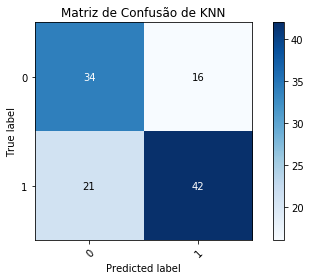

In [121]:
plot_confusion_matrix(Y_testExcluded, Y_predictedNeighborsExcluded, classes = ['0','1'],
                      title='Matriz de Confusão de KNN')